### CatsDogs_TF.ipynb

+ The code in this notebook demionstrates image classification using convolutional network models under Python/TF/Keras.

+ The API is TF/Kever 2.18

+ The data consists of the cats/dogs image data from Kaggle. The data is located  in two directories, FullSet and SmallSet.

```
    /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/
    /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/
```
Both datasets have the following structure.
```
    .../SmallSet/train/{cat, dog}      # 1,000 images of cats and 1,000 of dogs
    ...SmallSet/test/{cat, dog}        # 1,000 images of cats and 1,000 of dogs
    .../SmallSet/validation{cat,dog}   # 500 images of cats and 500 of dogs

    .../FullSet/train/{cat, dog}       # 5,000 images of cats and 5,000 of dogs
    .../FullSet/test/{cat, dog}        # 5,000 images of cats and 5,000 of dogs
    .../FullSet/validation{cat, dog}   # 2490 images of cats and 2469 dogs
```

+ There is a separate notebook (CatDogs_DataAugmentation_TF.ipynb) where processing is done using data augmentation.


In [1]:
import os 
import numpy as np
from icecream import ic

import tensorflow as tf
import matplotlib.pyplot as plt  # For visualization (optional)

import keras

2025-02-14 18:37:26.079496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739576246.092769   17610 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739576246.097783   17610 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 18:37:26.111766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# ic is the "right printer for debugging"
ic ("TF Version   ", tf.__version__)
ic ("TF Path      ", tf.__path__[0])
ic ("Keras version ", keras.__version__)
ic ("numpy version ", np.__version__)
ic("This is ic")
ic("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ic| 'TF Version   ', tf.__version__: '2.18.0'
ic| "TF Path      ": 'TF Path      '
    tf.__path__[0]: '/drv3/hm3/code/python/tf2.18/tf2.18/lib/python3.12/site-packages/keras/api/_v2'
ic| 'Keras version ', keras.__version__: '3.7.0'
ic| 'numpy version ', np.__version__: '1.26.4'
ic| 'This is ic'
ic| "Num GPUs Available: ": 'Num GPUs Available: '
    len(tf.config.list_physical_devices('GPU')): 1


('Num GPUs Available: ', 1)

In [3]:
# 1. Dataset Path and Parameters
data_dir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/"

data_dir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/"

image_height = 150  # Adjust as needed
image_width = 150  # Adjust as needed
batch_size = 32      # Adjust as needed
epochs = 20         # Adjust as needed

In [4]:
# 2. Get Class Names by Inspecting Directory (Essential)
class_names = sorted(os.listdir(data_dir))  # Get sorted list of subdirectories
num_classes = len(class_names) # Get number of classes
print("Class names:", class_names)

Class names: ['NewSavedModel', 'SavedHistory.npy', 'SavedModel', 'SavedModel.h5', 'plot1.png', 'plot2.png', 'test', 'train', 'validation']


In [5]:
# 2. Data Loading and Preprocessing using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/train",  # Path to training data
    labels='inferred',     # Infer labels from directory structure
    label_mode='binary',   # Use binary labels (0 for cat, 1 for dog)
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=True,          # Shuffle the training data
    validation_split=0.2,  # Create a validation set (optional)
    subset="training",      # Specify this is the training set
    seed=123               # For reproducibility (optional)
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


I0000 00:00:1739576248.719544   17610 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9526 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6


In [6]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/train",  # Same directory as training, but different subset
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False,         # No need to shuffle validation data
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [7]:
# 4.  Mapping Labels (if needed for display or other purposes)
# This is how we can map back to class names:
label_map = dict(zip(range(num_classes), class_names))

for images, labels in train_dataset.take(1):
    for i in range(len(images)):
        label_index = int(labels[i].numpy())
        class_name = label_map[label_index] # Get the class name
        print(f"Image {i+1}: {class_name}")


Image 1: SavedHistory.npy
Image 2: SavedHistory.npy
Image 3: SavedHistory.npy
Image 4: SavedHistory.npy
Image 5: SavedHistory.npy
Image 6: SavedHistory.npy
Image 7: SavedHistory.npy
Image 8: NewSavedModel
Image 9: SavedHistory.npy
Image 10: NewSavedModel
Image 11: NewSavedModel
Image 12: NewSavedModel
Image 13: NewSavedModel
Image 14: SavedHistory.npy
Image 15: NewSavedModel
Image 16: NewSavedModel
Image 17: SavedHistory.npy
Image 18: SavedHistory.npy
Image 19: NewSavedModel
Image 20: SavedHistory.npy
Image 21: NewSavedModel
Image 22: SavedHistory.npy
Image 23: NewSavedModel
Image 24: SavedHistory.npy
Image 25: NewSavedModel
Image 26: NewSavedModel
Image 27: SavedHistory.npy
Image 28: SavedHistory.npy
Image 29: NewSavedModel
Image 30: SavedHistory.npy
Image 31: NewSavedModel
Image 32: SavedHistory.npy


/tmp/ipykernel_17610/1999496799.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(labels[i].numpy())
2025-02-14 18:37:31.942470: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/test",  # Path to test data
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False        # No need to shuffle test data
)

Found 2000 files belonging to 2 classes.


In [9]:

# 3. Data Augmentation is done in CatsDogs_DataAugmentation_TF.ipynb 
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  # Add more augmentation layers as needed (e.g., zoom, shear)
])

# Example of applying augmentation:
for images, labels in train_dataset.take(1):  # Take one batch
    augmented_images = data_augmentation(images)
    # ... use augmented_images in training loop ...

2025-02-14 18:37:33.443684: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:

# 4. Prefetching (Essential for Performance)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


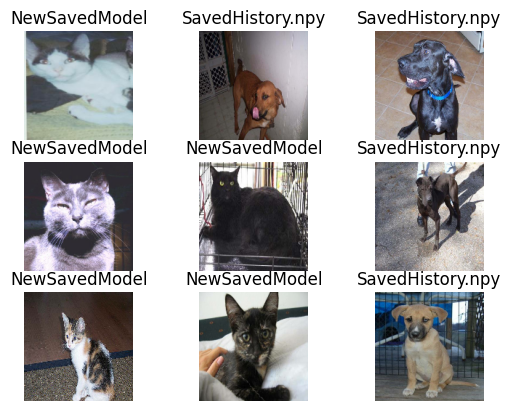

In [11]:

# 5. Display a few good images 

for images, labels in train_dataset.take(1):
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])]) # Convert to int for indexing
        plt.axis("off")
    plt.show()

In [12]:
# 2. Build CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)), # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (1 neuron for binary)
])


/drv3/hm3/code/python/tf2.18/tf2.18/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        36,993 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,241 (508.75 KB)

 Trainable params: 130,241 (508.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

# 3. Model Compilation
model.compile(
    optimizer='adam',  # We can experiment with other optimizers
    loss='binary_crossentropy', # Let's use 'categorical_crossentropy' for > 2 classes
    metrics=['accuracy']
)

In [15]:

# 4. Model Training
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)

Epoch 1/20


I0000 00:00:1739576254.891569   17753 service.cc:148] XLA service 0x74583800d330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739576254.931511   17753 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-02-14 18:37:35.411851: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739576255.775281   17753 cuda_dnn.cc:529] Loaded cuDNN version 90501


 9/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5026 - loss: 0.7507

I0000 00:00:1739576258.764893   17753 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.5159 - loss: 0.7123 - val_accuracy: 0.9975 - val_loss: 0.5236
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6072 - loss: 0.6656 - val_accuracy: 0.2725 - val_loss: 0.8052
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6566 - loss: 0.6025 - val_accuracy: 0.6125 - val_loss: 0.6096
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7320 - loss: 0.5211 - val_accuracy: 0.6475 - val_loss: 0.6000
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7764 - loss: 0.4906 - val_accuracy: 0.7475 - val_loss: 0.4537
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8137 - loss: 0.3870 - val_accuracy: 0.7675 - val_loss: 0.4266
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8429 - loss: 0.3359 - val_accuracy: 0.8975 - val_loss: 0.2470
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9059 - loss: 0.2583 - val_accuracy: 0.9350 - val_loss: 0.

In [16]:

# 5. Evaluate Model 
# test_dataset = ...  # Load the test dataset

# loss, accuracy = model.evaluate(test_dataset)
loss, accuracy = model.evaluate(validation_dataset)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 6. Plot Training History (Optional but very useful)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9623 - loss: 0.2455
Test Loss: 0.26653891801834106
Test Accuracy: 0.9474999904632568


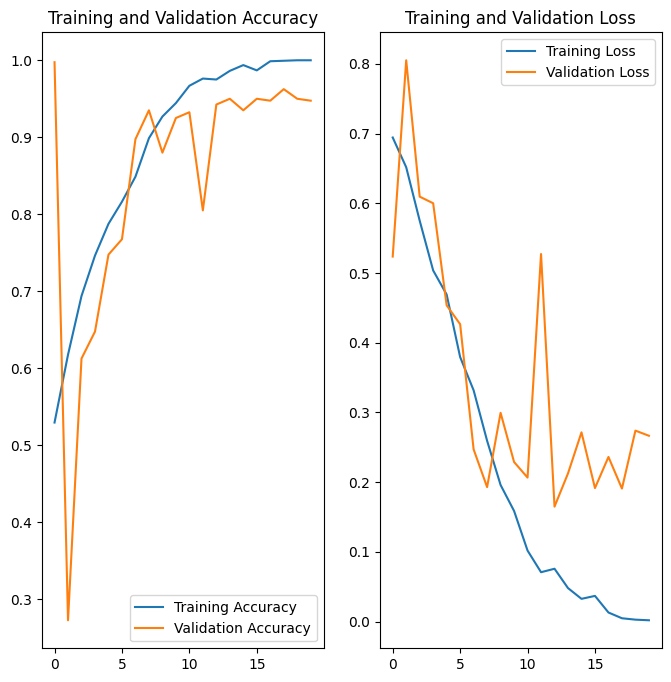

In [17]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

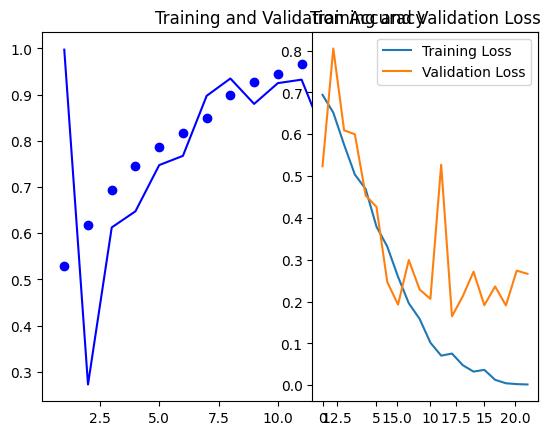

In [18]:
# second plot

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) +1)

plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs,  val_accuracy, "b", label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [19]:

# 7. Save the model
# File is quite big (228 MB) 
model.save("/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/NewSavedModel/newmodel.keras")
